<a href="https://colab.research.google.com/github/OlanIsm/Olanism/blob/main/Scientific_Computing_2802496243_Insan_Maulana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. You must find the trend on the bag’s production from the data. You must provide a mathematical model that can explain the production’s trend accurately. Since your supervisor want an accurate model, you must avoid any linear approach to build the trend model.

untuk soal ini saya akan memakai direct inverse polynomial regression derajat ke 3, karena sebelumnya dilab saya telah diajarkan cara memakai least square regression, dan membuat fcunction sendiri , dan dikarenakan least square regression derajat 3 **BUKANLAH** Linear equation (y = ax^3 + bx^2 + cx + d).

Model Regresi Polynomial Degree 3:
y = 0.004x^3 + -0.134x^2 + 47.224x + 1748.507


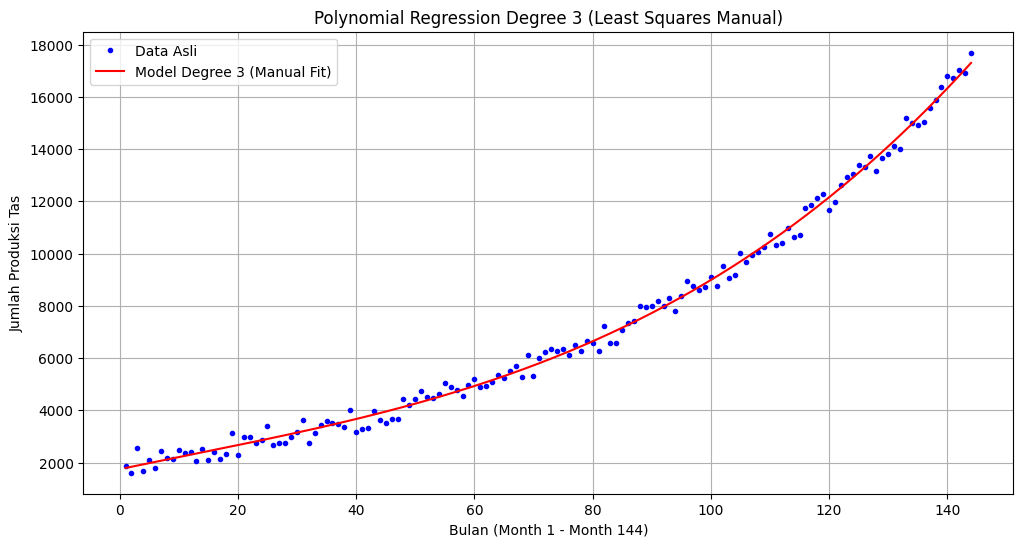

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ini adalah initialisasi data set dengan pandas
url = 'https://docs.google.com/spreadsheets/d/1iSg4bEQfkfi2o58HmcMDII0i6InqnZrT/export?format=csv'
df = pd.read_csv(url)

#print(df.columns) #ini berfungsi untuk mengetahui columnnya ada berapa dan bernama apa

# ini adalah code untuk menyiapkan x dan y
y = df.iloc[0].values.astype(float)  # Data produksi
x = np.arange(1, len(y) + 1)         # Bulan ke-1 sampai ke-144
y = y[:, np.newaxis]                 # Biar bisa dikali matriks

# ini adalah code stack untuk membuat matrix A derajat 3
A = np.vstack([x**3, x**2, x, np.ones(len(x))]).T

# code least square via direct inverse
result = np.linalg.inv(A.T @ A) @ A.T @ y
a, b, c, d = result.flatten()

# print hasil regresi 3 derajat
print("Model Regresi Polynomial Degree 3:")
print(f"y = {a:.3f}x^3 + {b:.3f}x^2 + {c:.3f}x + {d:.3f}")

# [lot hasil fitting
x_range = np.linspace(1, len(x), 500)
y_fit = a*x_range**3 + b*x_range**2 + c*x_range + d

# ini untuk visualisasi regression menggunakan pypolot
plt.figure(figsize=(12,6))
plt.plot(x, y, 'bo', markersize=3, label='Data Asli')
plt.plot(x_range, y_fit, 'r-', label='Model Degree 3 (Manual Fit)')
plt.xlabel('Bulan (Month 1 - Month 144)')
plt.ylabel('Jumlah Produksi Tas')
plt.title('Polynomial Regression Degree 3 (Least Squares Manual)')
plt.grid(True)
plt.legend()
plt.show()


2. Dan the mathematical model yang didapatkan dari soal sebelumnya akan saya pakai untuk nomor 2 menjadi numerical form (y = 0.004x^3 + -0.134x^2 + 47.224x + 1748.507) dan tentunya hanya 3 digit dibelakang comma seperti rules pada soal aol


In [25]:
def prediksi_produksi(x):
    return 0.004*x**3 - 0.134*x**2 + 47.224*x + 1748.507


In [26]:
from sklearn.metrics import mean_squared_error

y_pred = a*x**3 + b*x**2 + c*x + d
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f" AKURASI / RMSE Model: {rmse:.3f}")


 AKURASI / RMSE Model: 288.436


itu adalah bukti untuk ke akuratan model yang dipakai untuk data asli , untuk eror ini masih cukup rendag karena mean untuk data ini bisa dibilang cukup besar.

berikut saya buatkan code mean dari data soal

In [14]:
import numpy as np
import pandas as pd

url = 'https://docs.google.com/spreadsheets/d/1iSg4bEQfkfi2o58HmcMDII0i6InqnZrT/export?format=csv'
df = pd.read_csv(url)
y = df.iloc[0].values.astype(float)

mean_produksi = np.mean(y)
print(f"mean produksi: {mean_produksi:.3f}")

mean produksi: 7157.951


Berarti eror dari mean tersebut itu roughly sekitar 4.03 %

3. The warehouse was designed to be able to store a maximum of 25,000 (twenty five thousands) bags at each month. Your supervisor asked you to provide a prediction when do EGIER need to build a new warehouse based on the trend that you have acquired in problem #2. To build a new warehouse, it is predicted that they need at least 13 months. So provide the time when EGIER need to start building their new warehouse. (Hint: this can be approached as a root of equation problem).

untuk soal ini basically disuruh cari pada bulan keberapa produksi egier bisa menyentuh 25.000 tas dengan perkiraan waktu 13 bulan untuk ngebangun gudang baru , untuk soal ini saya akan memakai bisection method dengan menggunakan mathematical model dari soal pertama (y = 0.004x^3 + -0.134x^2 + 47.224x + 1748.507) , bisection ini mudah karena saya pernah diajarin hehe, dan memang lebih simple serta akurat

In [32]:
def produksi_model(x):
    return 0.00386*x**3 - 0.13436*x**2 + 47.22355*x + 1748.5067
    #ini adalah model yang dipakai dari hasil nomor 1

In [33]:
def f(x):
    return produksi_model(x) - 25000
    # fungsi untuk menebak target tas

In [37]:
def bisection(a, b, tol=1e-5, max_iter=1000):
    if f(a) * f(b) >= 0:
        print("Bisection method gagal: f(a) dan f(b) tidak beda tanda.")
        return None

    for i in range(max_iter):
        c = (a + b) / 2
        if abs(f(c)) < tol:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2  # approksimasi


# range tebakan, misalnya dari bulan 170,171
akar = bisection(170, 171)
print(f"tas mencapai 25.000 produk disekitar bulan ke-{akar:.3f}")

# waktu untuk ngebuat gudang baru , 13 ini maksudnya 13 bulan
start_bangun = akar - 13
print(f"Gudang bisa dibangun pada bulan ke-{start_bangun:.3f}")


tas mencapai 25.000 produk disekitar bulan ke-170.422
Gudang bisa dibangun pada bulan ke-157.422


dari fungsi diatas, saya menebak kalo f(x) = 0  tu ada di x saat 170 sekian, artinya monthly production tuh bisa nyentuh angka 25.000 di bulan ke 170, which is make sense dilihat dari grafiknya yang terus meningkat di soal nomor 1 , dan karena gudangnya memakan waktu 13 bulan maka saya menggunakan rumus akar - 13 untuk dimulainya pembangunan

Terima kasih pak untuk 1 semester dan ilmunya!